In [ ]:
"""
Creating an ANPR (Automatic Number Plate Recognition) program with python.
Images will be read with opencv, number plates will be detected with edge detection.
Number plate text will be extrated with easyOCR (optical character recognition framework).
"""

In [17]:
# !pip install easyocr
# !pip install imutils

In [18]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

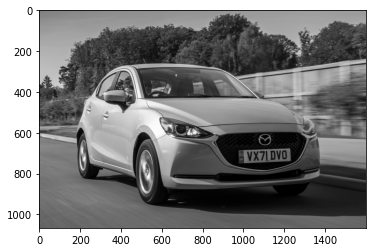

In [32]:
# reading image, setting grayscale
img = cv2.imread("files/car1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

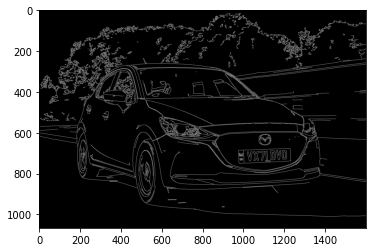

In [33]:
# noise reduction and edge detection
bfilter = cv2.bilateralFilter(gray, 11,17,17) # noise reduction
edged = cv2.Canny(bfilter, 30, 200) # edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [34]:
# finding contours and masking
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [35]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [36]:
location

array([[[1229,  680]],

       [[1228,  738]],

       [[1003,  747]],

       [[1001,  685]]], dtype=int32)

In [37]:
# creating a mask of zeros (0 = black)
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

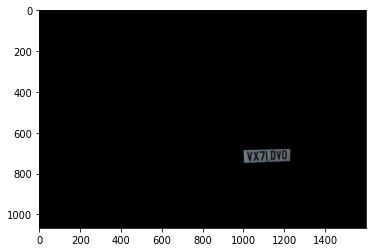

In [38]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [39]:
# extracting image area where mask is not black
(x,y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

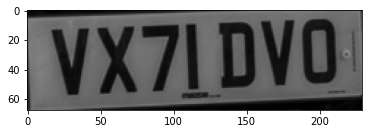

In [40]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [41]:
# using easyOCR to read text
reader = easyocr.Reader(["en"])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[8, 0], [222, 0], [222, 68], [8, 68]], 'VXZLDVO', 0.956038157735101)]

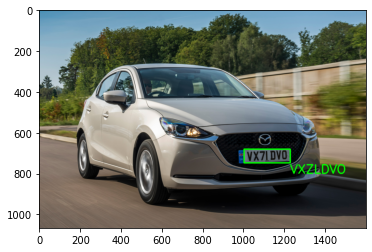

In [47]:
# overlaying text detection on original image
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60),
      fontFace=font, fontScale=2, color=(0,255,0), thickness=4, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),4)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
# plt.imsave('carocr.png', res)